# Loading data to visualize and compare sequence motifs between Baseline and Acute subjects

In [107]:
# load RSQLite to read the Transformed data
library(RSQLite)
library(data.table)
library(sqldf)

## Loading tables of junction_aa sequence data grouped by disease_stage

In [113]:
# connection to the SQLite database with queried tables
seq_db_path = 'disease_stage.db'
conn <- dbConnect(RSQLite::SQLite(), seq_db_path)

In [114]:
# get extracted tables by disease_stage
query_1 = 'SELECT * FROM tb1'
query_2 = 'SELECT * FROM tb2'

## Please enter value for junction_aa_length for visualization. See below the distribution of all values with a mode ~15.

In [115]:
junction_aa_length <- 15

In [116]:
# reloading datatables from the SQLite database

getdfRows <- function(conn, query_rows){
    
    conn <- dbConnect( # connection to SQLite database queried tables (Baseline and Acute)
        RSQLite::SQLite(), seq_db_path) 
    df = dbGetQuery(conn,query_rows) # saving the queried tables as dataframes 
    return(df)
}

Generate dataframe instance

In [117]:
df1 = getdfRows(conn, query_1) # creating instance of Baseline table
df2 = getdfRows(conn, query_2) # creating instance of Acute table

In [118]:
# delete the tables from the temporary connected SQLite database
dbRemoveTable(conn, "tb1", fail_if_missing = FALSE)
dbRemoveTable(conn, "tb2", fail_if_missing = FALSE)

Clean data

In [119]:
clean_df <- function(df){
    # Input : dataframe with specific disease_stage
    setDT(df)  
    cleaned_df <- df[
        junction_aa!="", ][ # remove blank sequences
        !grepl(pattern = "\\*",junction_aa) ] # remove sequences with asterisks

    return(cleaned_df)
             }

In [120]:
df1_cleaned = clean_df(df1) # creating instance of Baseline table
df2_cleaned = clean_df(df2) # creating instance of Acute table

Select data

Select junction_aa of specific length

In [121]:
# get junction_aa column from selected dataframe
select_junction_aa <- function(selected_df){
           
        #    input : "junction_aa" cleaned dataframe
        #    ouput : junction_aa
    seq <- selected_df$junction_aa  
    }

In [122]:
junction_aa_1 <- select_junction_aa(df1_cleaned)
junction_aa_2 <- select_junction_aa(df2_cleaned)

### plot distribution of junction_aa length


In [124]:
plot_hist <- function(junction_aa_1, junction_aa_2){
    
if (
    (length(junction_aa_2) != 0) &
    (length(junction_aa_1) != 0) &
    (length(unique(nchar(junction_aa_1))) > 1)& 
    (length(unique(nchar(junction_aa_2))) > 1)
    )
{
    
    par(mfrow = c(1,2))
    hist(nchar(junction_aa_1)
    ,   main = "Group 1",
    ,   xlab = "length of junction_aa",
    ,   ylab = "sequences_count")
    hist(nchar(junction_aa_2)
    ,   main = "Group 2",
    ,   xlab = "length of junction_aa",
    ,   ylab = "sequences_count")
}   else{
        print("One of the sequence group is empty or one group is of same length, perhaps check your query in sqlite_df_fn3.ipynb notebook")
        print(paste0("Number of unique values for length of junction_aa in group1 is ",length(unique(nchar(junction_aa_1)) )))
        print(paste0("Number of unique values for length of junction_aa in group2 is ",length(unique(nchar(junction_aa_1)) )))

}
    }

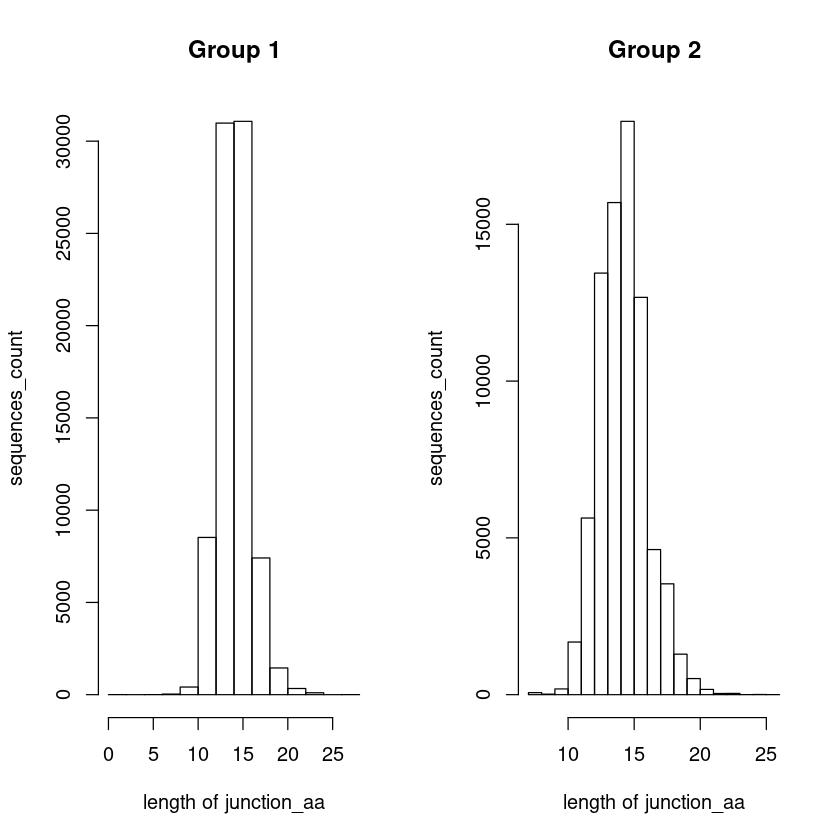

In [125]:
plot_hist(junction_aa_1, junction_aa_2)

Select subset of junction_aa with specific length

In [126]:
# subset junction_aa column of specific length
select_len <- function(junction_aa, len){
           
        #    input : "junction_aa" cleaned sequence, len length
        #    ouput : junction_aa with specific length
    seq <- junction_aa[nchar(junction_aa) == len] 
    return(seq)
    }

### pick sequences with length 15

In [127]:
seq1 <- select_len(junction_aa_1, junction_aa_length)
seq2 <- select_len(junction_aa_2, junction_aa_length)

# Data Analysis

In [28]:
library(universalmotif)

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



Visualize junction_aa as sequence motif

In [128]:
visualize_motif <- function(seq_len ){
    # input sequence of a specific length
    # ouput motif image
    view_motifs(
        convert_type(
            create_motif(
                seq_len, alphabet = "AA"),
         , type = "PCM"))
    }

VISUALIZE 

**BASELINE** MOTIFS

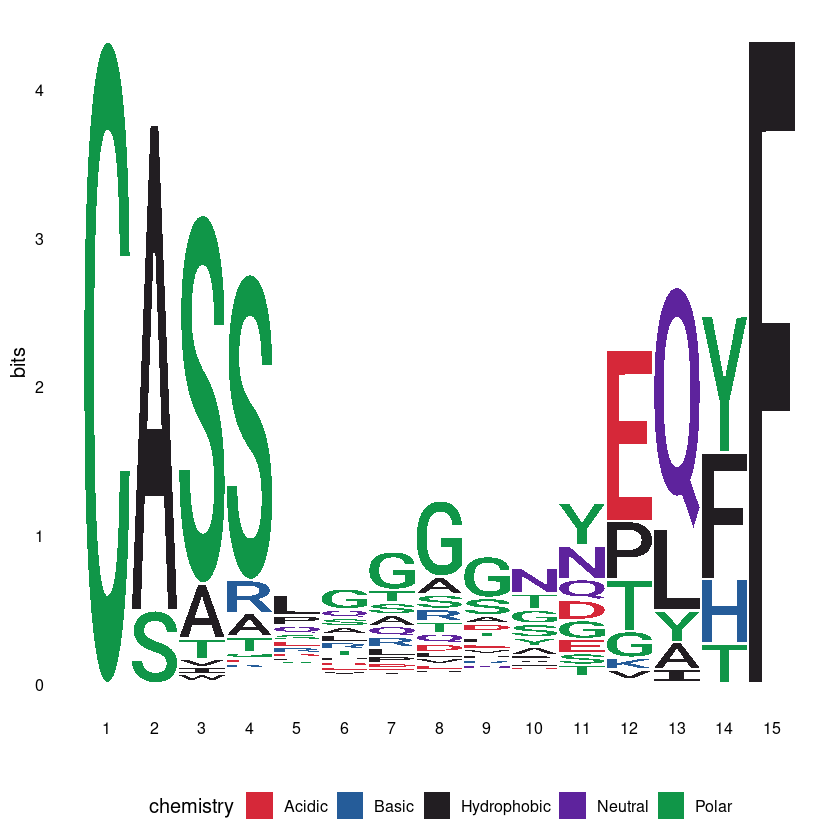

In [129]:
visualize_motif(seq1)

VISUALIZE 

**Acute** MOTIFS

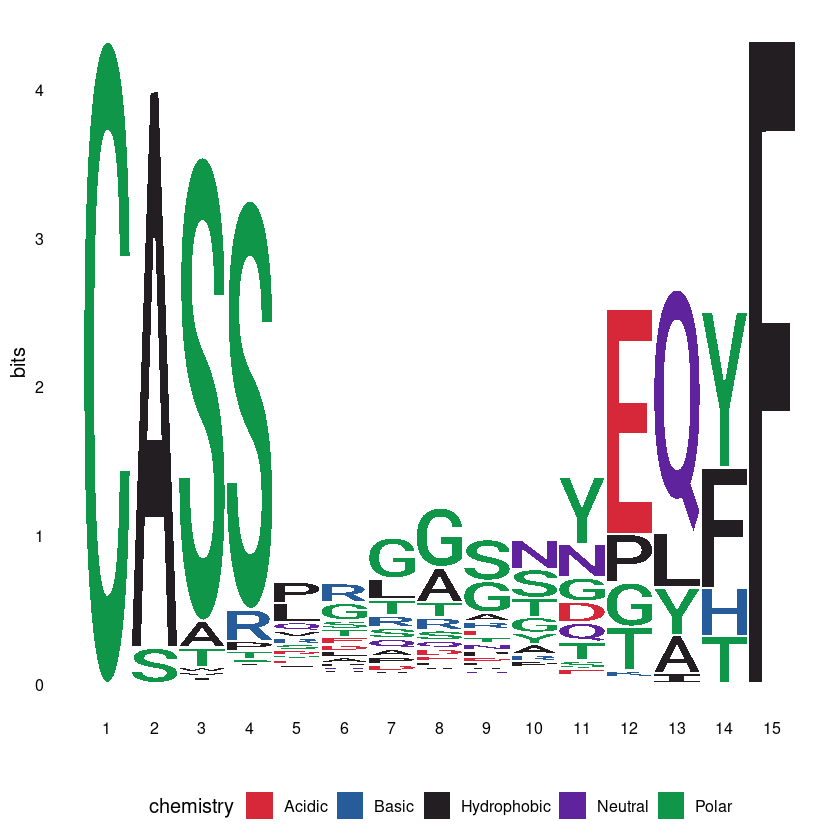

In [130]:
visualize_motif(seq2)

# Summary 
Position 1-4 ; conserved
Position 5: conserved
Position 11-13 variable

In [33]:
library(DiffLogo)

Loading required package: cba

Loading required package: grid

Loading required package: proxy


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




# Use DiffLogo to compare the motifs 

In [131]:
motif <- create_motif(
                seq1, alphabet = "AA")
pwm <- convert_type(motif, type = "PWM")


In [132]:
pwm


       Motif name:   motif
         Alphabet:   AA
             Type:   PWM
         Total IC:   31.89
        Consensus:   CASSLGGGGNYEQYF
     Target sites:   20229

      C     A     S     S     L     G     G     G     G     N     Y     E     Q
A  -Inf  4.12  1.23  0.22 -0.54  0.75  0.79  0.94  0.35  0.59 -3.25 -4.59  0.44
C  4.32  -Inf -7.98 -3.19  -Inf -9.98 -6.28  -Inf -7.98 -7.98 -9.98  -Inf -9.98
D  -Inf  -Inf  -Inf -4.98  0.05  0.08 -0.37 -0.13  0.29 -0.81  1.14 -7.66 -7.17
E  -Inf  -Inf  -Inf -1.91  0.51 -0.14 -0.91 -0.68 -0.26 -2.21  0.62  3.36 -6.28
F  -Inf  -Inf  -Inf -7.17 -0.35 -2.11 -2.46 -2.73 -1.17 -2.18 -4.46 -5.59  -Inf
G  -Inf -9.98 -4.46 -1.77 -0.49  2.14  2.55  3.06  2.71  1.29  1.08  0.68 -9.98
H  -Inf  -Inf -7.40 -4.49 -2.44 -3.24 -3.31 -2.76 -2.30 -1.95 -2.23  -Inf -8.98
I  -Inf  -Inf -1.73 -3.02 -0.97 -1.84 -1.53 -2.45 -1.60 -1.72 -4.66 -3.20 -0.54
K  -Inf  -Inf  -Inf -2.16 -1.81 -2.31 -2.37 -3.34 -2.30 -2.85 -6.17 -0.51 -8.98
L -9.98  -Inf -5.08 -4.25  2.19

In [55]:
library(TFBSTools)

ERROR: Error in library(TFBSTools): there is no package called ‘TFBSTools’


In [58]:
# write pwm matrix to file and reread 
library(yaml)

In [137]:
motif1


       Motif name:   motif
         Alphabet:   AA
             Type:   PPM
         Total IC:   31.89
        Consensus:   CASSLGGGGNYEQYF
     Target sites:   20229

  C    A    S    S    L    G    G    G    G    N    Y    E    Q    Y F
A 0 0.87 0.12 0.06 0.03 0.08 0.09 0.10 0.06 0.08 0.01 0.00 0.07 0.00 0
C 1 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0
D 0 0.00 0.00 0.00 0.05 0.05 0.04 0.05 0.06 0.03 0.11 0.00 0.00 0.00 0
E 0 0.00 0.00 0.01 0.07 0.05 0.03 0.03 0.04 0.01 0.08 0.51 0.00 0.00 0
F 0 0.00 0.00 0.00 0.04 0.01 0.01 0.01 0.02 0.01 0.00 0.00 0.00 0.34 1
G 0 0.00 0.00 0.01 0.04 0.22 0.29 0.42 0.33 0.12 0.11 0.08 0.00 0.00 0
H 0 0.00 0.00 0.00 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.00 0.00 0.17 0
I 0 0.00 0.02 0.01 0.03 0.01 0.02 0.01 0.02 0.02 0.00 0.01 0.03 0.00 0
K 0 0.00 0.00 0.01 0.01 0.01 0.01 0.00 0.01 0.01 0.00 0.03 0.00 0.00 0
L 0 0.00 0.00 0.00 0.23 0.08 0.06 0.03 0.05 0.03 0.01 0.00 0.21 0.00 0
M 0 0.00 0.00 0.00 0.01 0.01 0.00 0.01 0.01 0.01 0

In [138]:
# create motif using universalmotif
motif1 <- create_motif(seq1, alphabet = "AA")
#PCM = convert_type(motif1, "PWM")
# transform motif to matrix written 
# to temp file to read using motifStack for visualziation 
write_matrix(motif1, 'PCM', overwrite = TRUE, rownames = TRUE, header = FALSE)
write_motifs(motif, 'PCM_motif', overwrite = TRUE)
# convert 
PCM_table <- read.table("PCM", header = FALSE, row.names = 1)
motif_con <- read_yaml('PCM_motif')[8]
names(PCM_table) <- strsplit(motif_con[[1]], split = "")[[1]]
pcm_mat = as.matrix(PCM_table)

In [143]:
pcm_mat

,C,A,S,S,L,G,G,G,G,N,Y,E,Q,Y,F
A,0.000000e+00,8.684562e-01,1.174057e-01,0.0580849276,0.034504919,8.418607e-02,0.0862128627,0.096247961,0.0635720995,0.0754856889,5.240002e-03,2.076227e-03,6.792229e-02,0.000000e+00,0.000000e+00
C,9.996045e-01,0.000000e+00,1.977359e-04,0.0054871719,0.000000000,4.943398e-05,0.0006426418,0.000000000,0.0001977359,0.0001977359,4.943398e-05,0.000000e+00,4.943398e-05,0.000000e+00,0.000000e+00
D,0.000000e+00,0.000000e+00,0.000000e+00,0.0015818874,0.051905680,5.294379e-02,0.0388056750,0.045676998,0.0612981363,0.0284739730,1.099412e-01,2.471699e-04,3.460379e-04,0.000000e+00,0.000000e+00
E,0.000000e+00,0.000000e+00,0.000000e+00,0.0132977409,0.071086065,4.552870e-02,0.0266449157,0.031192842,0.0417717139,0.0108260418,7.706758e-02,5.133719e-01,6.426418e-04,0.000000e+00,0.000000e+00
F,0.000000e+00,0.000000e+00,0.000000e+00,0.0003460379,0.039300015,1.156755e-02,0.0090958525,0.007513965,0.0222452914,0.0110237777,2.273963e-03,1.038114e-03,0.000000e+00,3.448515e-01,9.999506e-01
G,0.000000e+00,4.943398e-05,2.273963e-03,0.0146818923,0.035543032,2.210688e-01,0.2926986010,0.415888081,0.3280933314,0.1222502348,1.056404e-01,8.023135e-02,4.943398e-05,0.000000e+00,0.000000e+00
H,0.000000e+00,0.000000e+00,2.966039e-04,0.0022245291,0.009194720,5.289436e-03,0.0050422661,0.007365663,0.0101834001,0.0129022690,1.062831e-02,0.000000e+00,9.886796e-05,1.747491e-01,0.000000e+00
I,0.000000e+00,0.000000e+00,1.507736e-02,0.0061792476,0.025458500,1.394038e-02,0.0173513273,0.009145286,0.0164615156,0.0152256661,1.977359e-03,5.437738e-03,3.440605e-02,0.000000e+00,0.000000e+00
K,0.000000e+00,0.000000e+00,0.000000e+00,0.0112215137,0.014286420,1.008453e-02,0.0096890603,0.004943398,0.0101339661,0.0069207573,6.920757e-04,3.499926e-02,9.886796e-05,0.000000e+00,0.000000e+00
L,4.943398e-05,0.000000e+00,1.483019e-03,0.0026200010,0.228681596,8.033022e-02,0.0640664393,0.034060013,0.0469622819,0.0302535963,7.118493e-03,6.426418e-04,2.051510e-01,4.943398e-05,0.000000e+00


In [144]:
seqLogo::seqLogo(pwm = pwm1)

ERROR: Error in seqLogo::seqLogo(pwm = pwm1): object 'pwm1' not found


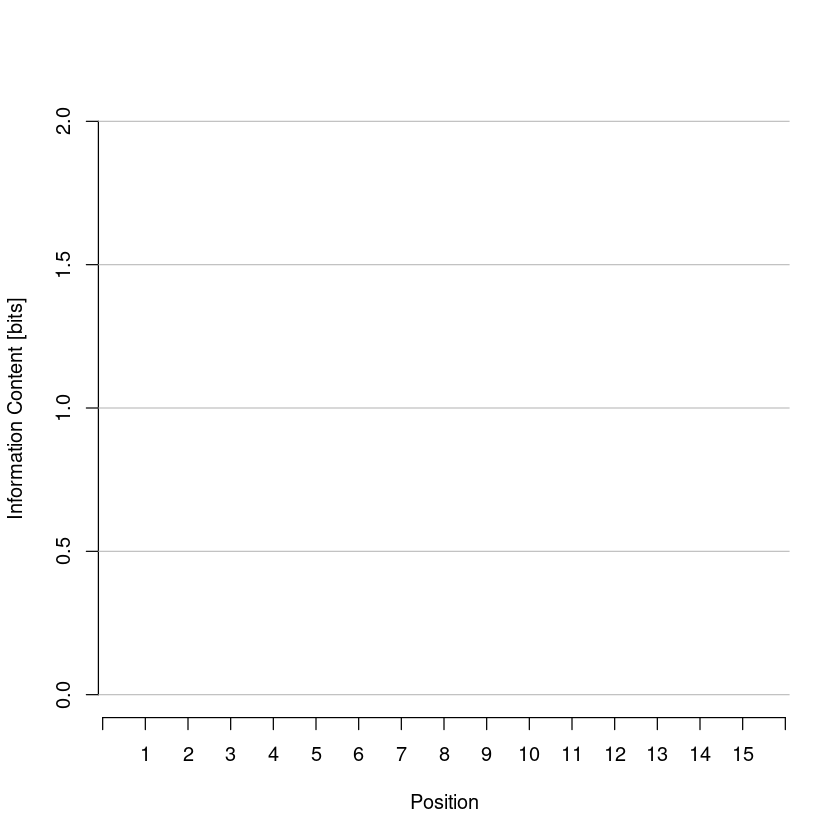

In [142]:
seqLogo(pcm_mat)

In [95]:
motif_con[[1]]
names(PCM_table) <- strsplit(motif_con[[1]], split = "")

[1] "CASSLLYVLGTEAFF"

In [102]:
strsplit(motif_con[[1]], split = "")[[1]]

[1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

In [96]:
PCM_table

,"c(""C"", ""A"", ""S"", ""S"", ""L"", ""L"", ""Y"", ""V"", ""L"", ""G"", ""T"", ""E"", ""A"", ""F"", ""F"")",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,0,100,0,0,0,0,0,0,0,0,0,0,100,0,0
C,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0
F,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100
G,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
I,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
x

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


In [63]:
write_matrix(pwm, 'pcm0', overwrite = TRUE, rownames = TRUE, header = FALSE)
write_motifs(motif1, 'pcm0_motif', overwrite = TRUE)

ERROR: Error in as.yaml(motif): Unknown emitter error


In [73]:
# Not run:
# writing to a file connection
filename <- tempfile()
con <- file(filename, "w")
write_yaml(seq1, con)
close(con)
# using a filename to specify output file
write_yaml(seq1, filename)

In [70]:
write_yaml(pwm)

ERROR: Error in as.yaml(x, ...): Unknown emitter error


In [46]:
seqLogo(pwm = pwm)

[1] "pwm must be of class matrix or data.frame. Trying to convert"


ERROR: Error in as.vector(data): no method for coercing this S4 class to a vector
